In [2]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm



Jackson model
* Start with m nodes
* New nodes are introduced to m nodes
* Befriend with probability pm
* New nodes are then introduced to n of those pm nodes' connections
* Befriend with probability pn
* Continue for as many iterations as would like

Looped version

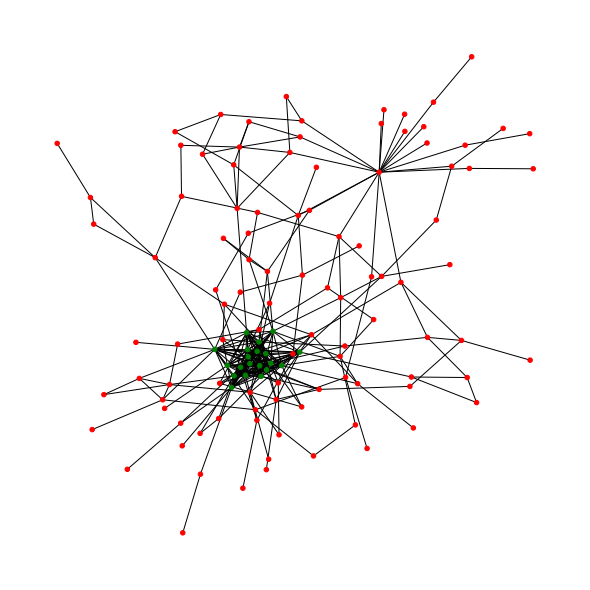

In [432]:

m = 5
n = 5
initial_n = 20
T = 100

pm = 0.25
pn = 0.1

# initialise with m nodes
#G.clear()
G = nx.Graph()
G.add_nodes_from([i+1 for i in range(initial_n)])

'''each node needs at least m+n connections'''
initial_nodes = list(G.nodes())

if True:
    for node in initial_nodes:
        possible_links = initial_nodes.copy()
        possible_links.remove(node) # remove own node
        
        initial_neighbours = np.random.choice(possible_links, m+n, replace=False)
        initial_edges = [(initial_neighbour, node) for initial_neighbour in initial_neighbours]
        G.add_edges_from(initial_edges)

#colormap = ['green' if node in initial_nodes else 'red' for node in G]
#nx.draw_circular(G, node_color = colormap, with_labels = True)



for t in range(T):
    # Begin
    current_nodes = list(G.nodes())
    new_node = max(current_nodes) + 1


    # Find parent nodes
    parent_nodes = np.random.choice(current_nodes, m, replace=False) * np.random.choice([0,1], size=m, p=[1-pm,pm])
    parent_nodes = parent_nodes[parent_nodes > 0]
    parent_edges = [(new_node, parent_node) for parent_node in parent_nodes]

    G.add_node(new_node)

    #colormap = ['green' if node in initial_nodes else 'red' for node in G]
    #nx.draw_networkx(G, node_color = colormap, with_labels = True)


    # Parent neighbour nodes
    if np.array(parent_nodes).size == 0:
        parent_neighbours = []
    else:
        parent_neighbours = np.concatenate(([list(G[parent]) for parent in parent_nodes]))


    parent_neighbours_meets = np.zeros(1) # initialise

    if np.array(parent_neighbours).size != 0: # check if empty
        
        # define the number of encounters: if the parent has fewer neighborus
        n_possible_encounters = min(parent_neighbours.size, n)
        #print(n_possible_encounters)

        parent_neighbours_meets = np.random.choice(parent_neighbours, n_possible_encounters, replace=False) * np.random.choice([0,1], size = n_possible_encounters, p = [1-pn, pn])
        #print(np.random.choice(parent_neighbours, n_possible_encounters, replace=False))
        #print(parent_neighbours)
        parent_neighbours_meets = parent_neighbours_meets[parent_neighbours_meets > 0]
    else:
        pass

    # combine the two connection lists
    connection_targets = np.concatenate((parent_nodes, parent_neighbours_meets))

    # remove own links
    if new_node in connection_targets: connection_targets.remove(new_node)

    connections = [(new_node, node) for node in connection_targets]


    G.add_edges_from(connections)


    #colormap = ['green' if node in initial_nodes else 'red' for node in G]
    #nx.draw_circular(G, node_color = colormap, with_labels=True)


plt.figure(figsize=(8,8))

colormap = ['green' if node in initial_nodes else 'red' for node in G]
nx.draw_spring(G, node_color = colormap, node_size = 20, with_labels=False)

plt.show()



### Stepped version

Initialisation

In [359]:

np.concatenate([np.array(G[i]) for i in [1,2,3]])


array([16,  8, 14,  7, 15,  9, 18, 10, 17, 11,  2,  4, 13, 14, 16,  1, 11,
       17,  5,  9,  4, 12,  7,  3,  6,  8, 10, 13, 19, 17,  7,  5, 15,  2,
       11, 10,  9, 14, 18,  6, 12, 13, 16])

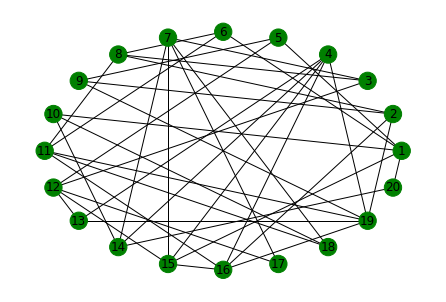

In [195]:

m = 1
n = 1
initial_n = 20

pm = 0.5
pn = 0.5

# initialise with m nodes
#G.clear()
G = nx.Graph()
G.add_nodes_from([i+1 for i in range(initial_n)])

'''each node needs at least m+n connections'''
initial_nodes = list(G.nodes())

if True:
    for node in initial_nodes:
        possible_links = initial_nodes.copy()
        possible_links.remove(node) # remove own node
        
        initial_neighbours = np.random.choice(possible_links, m+n, replace=False)
        initial_edges = [(initial_neighbour, node) for initial_neighbour in initial_neighbours]
        G.add_edges_from(initial_edges)

colormap = ['green' if node in initial_nodes else 'red' for node in G]
nx.draw_circular(G, node_color = colormap, with_labels = True)


Meeting parents

[22]


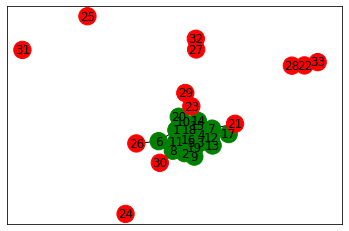

In [209]:

current_nodes = list(G.nodes())
new_node = max(current_nodes)

# dot product to only keep the ones with 1
parent_nodes = np.random.choice(current_nodes, m, replace=False) * np.random.choice([0,1], size=m, p=[1-pm,pm])
parent_nodes = parent_nodes[parent_nodes > 0]
parent_edges = [(new_node, parent_node) for parent_node in parent_nodes]

print(parent_nodes)

G.add_node(new_node)
G.add_edges_from(parent_edges)

colormap = ['green' if node in initial_nodes else 'red' for node in G]
nx.draw_networkx(G, node_color = colormap, with_labels = True)



Meeting parents' neighbours

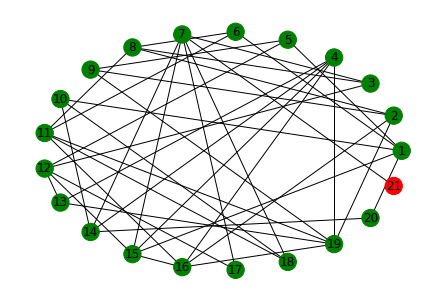

In [197]:

parent_neighbours = np.unique(np.array([list(G[parent]) for parent in parent_nodes]))
parent_neighbours_meets = np.random.choice(parent_neighbours, n, replace=False) * np.random.choice([0,1], size = n, p = [1-pn, pn])
parent_neighbours_meets = parent_neighbours_meets[parent_neighbours_meets > 0]
parent_neighbour_edges = [(new_node, parent_neighbour) for parent_neighbour in parent_neighbours_meets]

G.add_edges_from(parent_neighbour_edges)

colormap = ['green' if node in initial_nodes else 'red' for node in G]
nx.draw_circular(G, node_color = colormap, with_labels=True)
